# Restricted Boltzmann Machines

### Energy-based model
Energy-based models associate a scalar energy to each configuration of the variables of interest. Low energy is more desirable. The probability distribution based on an energy function can be defined as follows
$$ \Pr(x) = \frac{\exp (-E(x))}{Z}\,,$$
where $Z = \sum_{x} \exp (-E(x))$ denotes the normalization factor or **partition function**. 

### Restricted Boltzmann Machine

Restricted Boltzmann Machine (RBM) has an efficient training algorithm. In order to increase the expressive power of the model, we do not observe the example $x$ fully, we also want to introduce some non-observed variables.  Consider an observed part $x$ and a hidden part $h$. We can then write:
$$\Pr(x) = \sum_h \frac{\exp (-E(x, h))}{Z} \,.$$

In RBM, the energy function is defined as
$$
E(x, h) = -a^\top x - b^\top h - x^\top W h \,.
$$

To make RBM as an energy-based model, the free energy function is computed as follows
$$
\begin{align}
F(x) &= -\log \sum_h \exp (-E(x, h)) \\
     &= -a^\top x - \sum_j \log (1 + \exp(W^{\top}_jx + b_j))\,.
\end{align}
$$

We have an tractable expression for the conditional probabilities
$$
\Pr (h|x) = \prod_i \Pr (h_i | x)
$$

In [15]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import torch.utils.data as utils

from rbm import RBM
from libs import train, PCDtrain, show_and_save, average_stocastic_reconstruction, plot_images

import numpy as np
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Make some configurations

In [16]:
batch_size = 64 # batch size
n_epochs = 10 # number of epochs
lr = 0.01 # learning rate
n_hid = 500 # number of neurons in the hidden layer
n_vis = 784 # input size

Prepare the data set

In [3]:
# FashionMNIST
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
bin_train_x = []
bin_train_y = []
for i, (x,y) in enumerate(trainset):
    x[x>0.5] = 1
    x[x<0.5] = 0
    bin_train_x.append(x)
    bin_train_y.append(torch.tensor(y))
bin_train_data = torch.utils.data.TensorDataset(torch.stack(bin_train_x), torch.stack(bin_train_y))
trainloader = torch.utils.data.DataLoader(bin_train_data, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
bin_test_x = []
bin_test_y = []
for i, (x,y) in enumerate(testset):
    x[x>0.5] = 1
    x[x<0.5] = 0
    bin_test_x.append(x)
    bin_test_y.append(torch.tensor(y))
bin_test_data = torch.utils.data.TensorDataset(torch.stack(bin_test_x), torch.stack(bin_test_y))
testloader = torch.utils.data.DataLoader(bin_test_data, batch_size=batch_size, shuffle=False, num_workers=2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [83]:
path = '../models/bin_k2_500_15iters'

In [18]:
#model = torch.load(path)

In [26]:
# create a Restricted Boltzmann Machine
model_k1 = RBM(n_vis=n_vis, n_hid=n_hid, k=1).to(device)
asr_arr_k1 = []
loss_arr_k1 = []

In [27]:
model_k10 = RBM(n_vis=n_vis, n_hid=n_hid, k=10).to(device)
asr_arr_k10 = []
loss_arr_k10 = []

In [42]:
model_k2 = RBM(n_vis=n_vis, n_hid=n_hid, k=2).to(device)
asr_arr_k2 = []
loss_arr_k2 = []

In [52]:
model_k5 = RBM(n_vis=n_vis, n_hid=n_hid, k=5).to(device)
asr_arr_k5 = []
loss_arr_k5 = []

In [70]:
model_pcd_k1 = RBM(n_vis=n_vis, n_hid=n_hid, k=1).to(device)
asr_arr_pcd_k1 = []
loss_arr_pcd_k1 = []

Then train the model.

In [40]:
model_k1, asr, loss = train(model_k1, device, trainloader, testloader, n_epochs=5, lr=lr)
asr_arr_k1 += asr
loss_arr_k1 += loss

Epoch 0	 Loss=4.4284
average_stocastic_reconstruction: 44.91087807819342
Epoch 1	 Loss=4.2950
average_stocastic_reconstruction: 44.54049658319753
Epoch 2	 Loss=4.3346
average_stocastic_reconstruction: 44.25299135438956
Epoch 3	 Loss=4.4141
average_stocastic_reconstruction: 43.94787471309589
Epoch 4	 Loss=4.3822
average_stocastic_reconstruction: 43.76615489060712


In [41]:
model_k10, asr, loss = train(model_k10, device, trainloader, testloader, n_epochs=5, lr=lr)
asr_arr_k10 += asr
loss_arr_k10 += loss

Epoch 0	 Loss=6.2067
average_stocastic_reconstruction: 45.11624927885214
Epoch 1	 Loss=6.1655
average_stocastic_reconstruction: 44.76351541166852
Epoch 2	 Loss=6.3617
average_stocastic_reconstruction: 44.40334452489379
Epoch 3	 Loss=6.3110
average_stocastic_reconstruction: 44.10763864456468
Epoch 4	 Loss=6.3696
average_stocastic_reconstruction: 43.890234965427666


In [44]:
model_k2, asr, loss = train(model_k2, device, trainloader, testloader, n_epochs=15, lr=lr)
asr_arr_k2 += asr
loss_arr_k2 += loss

Epoch 0	 Loss=113.0087
average_stocastic_reconstruction: 55.54691533374179
Epoch 1	 Loss=14.6688
average_stocastic_reconstruction: 53.49750393667039
Epoch 2	 Loss=6.8996
average_stocastic_reconstruction: 51.809120384750855
Epoch 3	 Loss=5.0801
average_stocastic_reconstruction: 50.26949718499639
Epoch 4	 Loss=4.4883
average_stocastic_reconstruction: 48.852369903758834
Epoch 5	 Loss=4.5248
average_stocastic_reconstruction: 47.846166343445994
Epoch 6	 Loss=4.5884
average_stocastic_reconstruction: 46.78083575303388
Epoch 7	 Loss=4.7096
average_stocastic_reconstruction: 46.07594299316406
Epoch 8	 Loss=4.6568
average_stocastic_reconstruction: 45.448941030320086
Epoch 9	 Loss=4.8088
average_stocastic_reconstruction: 45.046884536743164
Epoch 10	 Loss=4.6767
average_stocastic_reconstruction: 44.45078033398671
Epoch 11	 Loss=4.8372
average_stocastic_reconstruction: 44.14386667871172
Epoch 12	 Loss=4.7284
average_stocastic_reconstruction: 43.88707090487146
Epoch 13	 Loss=4.8324
average_stocastic_

In [53]:
model_k5, asr, loss = train(model_k5, device, trainloader, testloader, n_epochs=15, lr=lr)
asr_arr_k5 += asr
loss_arr_k5 += loss

Epoch 0	 Loss=134.2533
average_stocastic_reconstruction: 55.972725412648195
Epoch 1	 Loss=16.7951
average_stocastic_reconstruction: 54.29160045210723
Epoch 2	 Loss=7.8087
average_stocastic_reconstruction: 52.32940322730192
Epoch 3	 Loss=5.5111
average_stocastic_reconstruction: 50.71879600719282
Epoch 4	 Loss=5.0657
average_stocastic_reconstruction: 49.456915594210294
Epoch 5	 Loss=5.0642
average_stocastic_reconstruction: 48.24800450027369
Epoch 6	 Loss=5.0147
average_stocastic_reconstruction: 47.27193079176982
Epoch 7	 Loss=5.0253
average_stocastic_reconstruction: 46.619094739294354
Epoch 8	 Loss=5.3059
average_stocastic_reconstruction: 45.836213045059495
Epoch 9	 Loss=5.3573
average_stocastic_reconstruction: 45.65798115578427
Epoch 10	 Loss=5.3478
average_stocastic_reconstruction: 45.10212531363129
Epoch 11	 Loss=5.4171
average_stocastic_reconstruction: 44.92849116720212
Epoch 12	 Loss=5.4316
average_stocastic_reconstruction: 44.421825323894524
Epoch 13	 Loss=5.5587
average_stocastic_

In [71]:
model_pcd_k1, asr, loss = PCDtrain(model_pcd_k1, device, trainloader, testloader, n_epochs=15, lr=lr)
asr_arr_pcd_k1 += asr
loss_arr_pcd_k1 += loss

Epoch 0	 Loss=10.7624
average_stocastic_reconstruction: 114.58376482337903
Epoch 1	 Loss=6.5763
average_stocastic_reconstruction: 75.8523222807866
Epoch 2	 Loss=4.2230
average_stocastic_reconstruction: 66.62626679535884
Epoch 3	 Loss=3.4588
average_stocastic_reconstruction: 63.72303367420366
Epoch 4	 Loss=2.9683
average_stocastic_reconstruction: 62.84326991913425
Epoch 5	 Loss=2.5644
average_stocastic_reconstruction: 62.71438085956938
Epoch 6	 Loss=2.2940
average_stocastic_reconstruction: 63.05430053905317
Epoch 7	 Loss=1.9798
average_stocastic_reconstruction: 63.54781079140439
Epoch 8	 Loss=1.7348
average_stocastic_reconstruction: 63.96999322684707
Epoch 9	 Loss=1.7066
average_stocastic_reconstruction: 64.75666838238953
Epoch 10	 Loss=1.5129
average_stocastic_reconstruction: 65.11777044405603
Epoch 11	 Loss=1.4330
average_stocastic_reconstruction: 65.32439804077148
Epoch 12	 Loss=1.3139
average_stocastic_reconstruction: 65.66383240329232
Epoch 13	 Loss=1.2292
average_stocastic_reconst

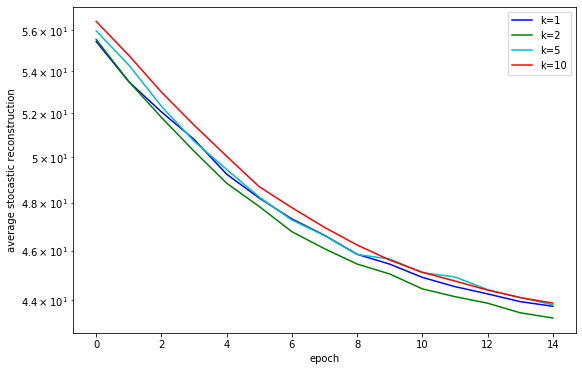

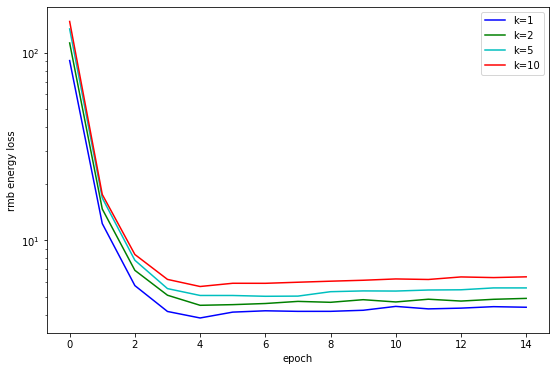

In [78]:
plt.rcParams['figure.figsize'] = [9,6]
plt.semilogy(loss_arr_k1, 'b')
plt.semilogy(loss_arr_k2, 'g')
plt.semilogy(loss_arr_k5, 'c')
plt.semilogy(loss_arr_k10, 'r')
plt.xlabel('epoch')
plt.ylabel('average stocastic reconstruction')
plt.gca().legend(('k=1','k=2', 'k=5','k=10'))
plt.show()
plt.semilogy(asr_arr_k1, 'b')
plt.semilogy(asr_arr_k2, 'g')
plt.semilogy(asr_arr_k5, 'c')
plt.semilogy(asr_arr_k10, 'r')
plt.xlabel('epoch')
plt.ylabel('rmb energy loss')
plt.gca().legend(('k=1','k=2', 'k=5','k=10'))
plt.show()

In [77]:
print(asr_arr_k1[-1])
print(asr_arr_pcd_k1[-1])

4.382226874833422
1.1736184061209023


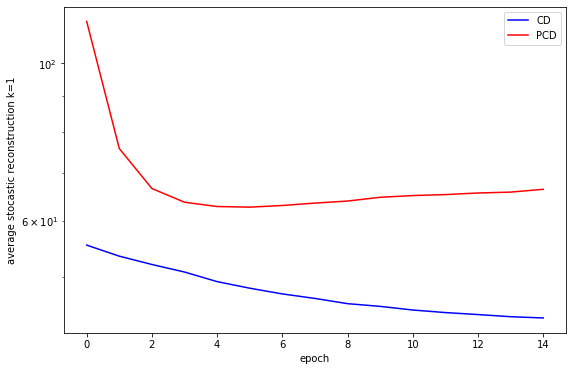

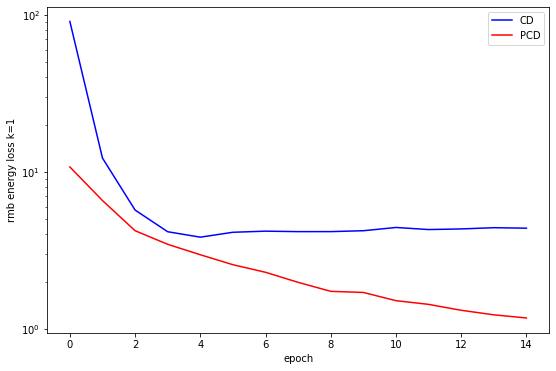

In [80]:
plt.rcParams['figure.figsize'] = [9,6]
#pcm_k1
plt.semilogy(loss_arr_k1, 'b')
plt.semilogy(loss_arr_pcd_k1, 'r')
plt.xlabel('epoch')
plt.ylabel('average stocastic reconstruction k=1')
plt.gca().legend(('CD', 'PCD'))
plt.show()
plt.semilogy(asr_arr_k1, 'b')
plt.semilogy(asr_arr_pcd_k1, 'r')
plt.xlabel('epoch')
plt.ylabel('rmb energy loss k=1')
plt.gca().legend(('CD', 'PCD'))
plt.show()

In [81]:
average_stocastic_reconstruction(model_k2, device, testloader)

average_stocastic_reconstruction: 43.3016707061962


43.3016707061962

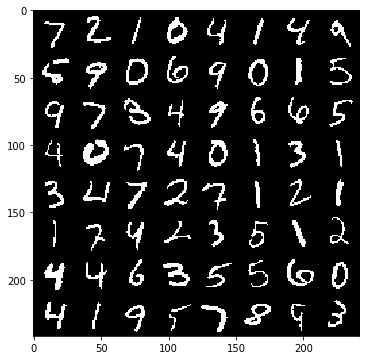

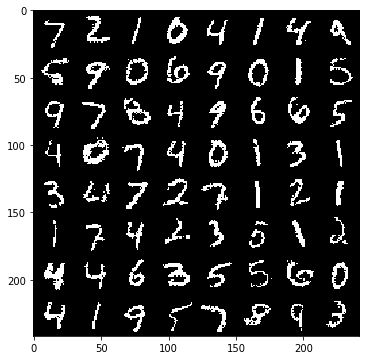

In [82]:
plot_images(model_k2, device, testloader, batch_size)

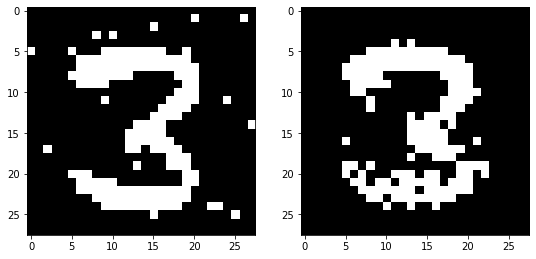

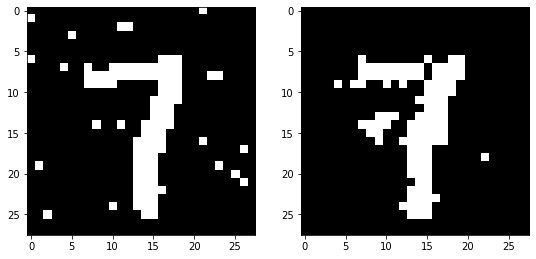

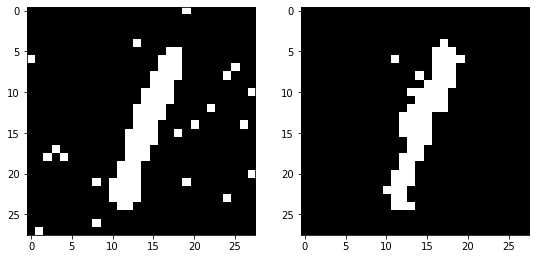

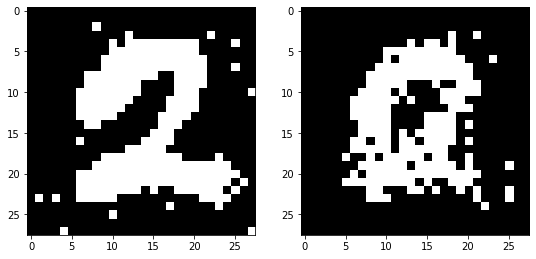

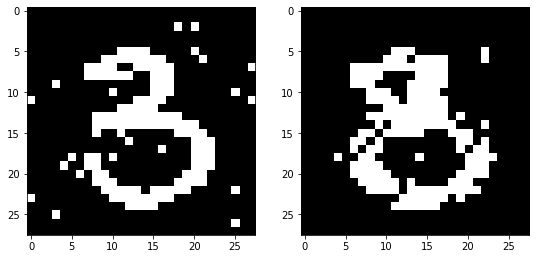

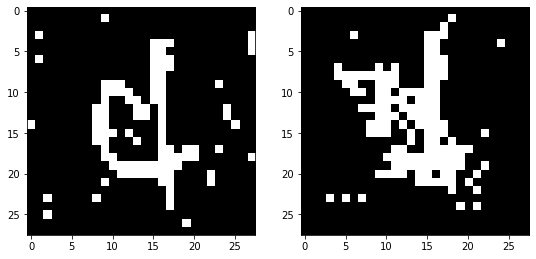

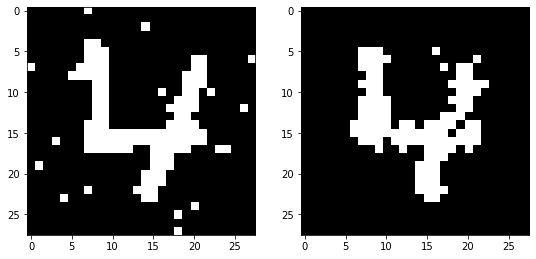

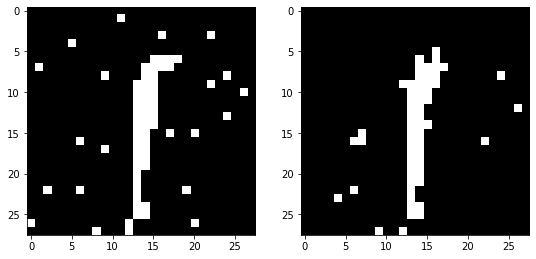

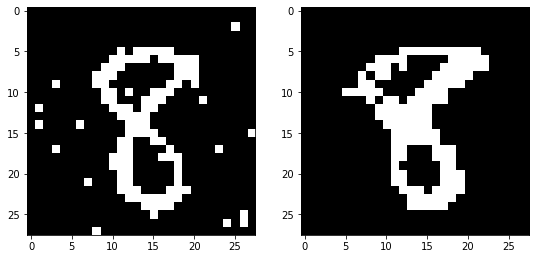

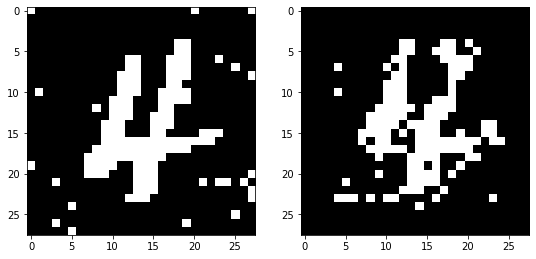

In [88]:
# noise
test_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in test_indices:
    noise_image = next(iter(trainloader))[0][i]
    # Noise image
    import random
    for i in range(28):
        for j in range(28):
            if random.uniform(0, 1) < 0.03:
                noise_image[0][i][j] = 1

    fig, axe = plt.subplots(1, 2)
    axe[0].imshow(noise_image.squeeze(), cmap='gray')
    h = model.visible_to_hidden(noise_image.view(-1, 784).to(device))
    x_ = model.hidden_to_visible(h)
    x_image = x_.cpu().detach().view(1, 28, 28)
    axe[1].imshow(x_image.squeeze(), cmap='gray')
    plt.show()

In [84]:
torch.save(model_k2, path)

How one image is factorized through the hidden variables

In [305]:
print(data)
#model.visible_to_hidden()

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./output
    Split: Train


In [352]:
v, tensor_y = next(iter(data_loader))
tensor_x = model.visible_to_hidden(v.view(-1, 784))

In [368]:
# print(len(result))
#print(tensor_y.shape)
my_dataset = utils.TensorDataset(tensor_x.detach(), tensor_y.detach())
my_dataloader = utils.DataLoader(my_dataset, batch_size = 64)

In [370]:
pickle.dump(my_dataloader, open("h_dataloader.p", "wb"))

In [366]:
index = 0

torch.Size([128])


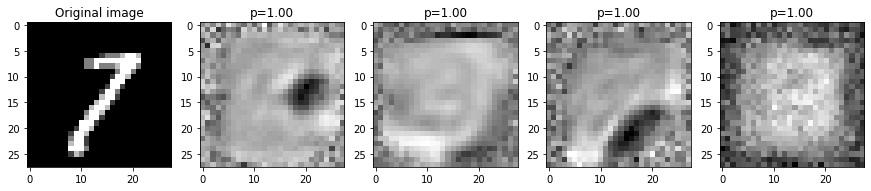

In [63]:
n_sample = 4
kth = 18
d = images[kth:kth+1]

V = torch.sigmoid(F.linear(d.view(1, -1), model.W, model.h))
v, o = torch.sort(V.view(-1))

fig, ax = plt.subplots(1, n_sample + 1, figsize=(3*(1 + n_sample),3))
ax[0].imshow(d.view(28, 28).numpy(), cmap='gray')
ax[0].set_title('Original image')

for k, i in enumerate(o[-n_sample:].numpy()):
    f = model.W[i].view(28, 28).data.numpy()
    ax[k + 1].imshow(f, cmap='gray')
    ax[k + 1].set_title('p=%.2f'% V[0][i].item())
    
plt.savefig('output/factor.png', dpi=200)